In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.interpolate import griddata
import pandas as pd

BCIsensor_xy = np.genfromtxt('BCIsensor_xy.csv',delimiter=',')
feaSubEImg_1 = np.genfromtxt('feaSubEImg_1.csv',delimiter=',')
feaSubEImg_2 = np.genfromtxt('feaSubEImg_2.csv',delimiter=',')
feaSubEOvert_1 = np.genfromtxt('feaSubEOvert_1.csv',delimiter=',')
feaSubEOvert_2 = np.genfromtxt('feaSubEOvert_2.csv',delimiter=',')

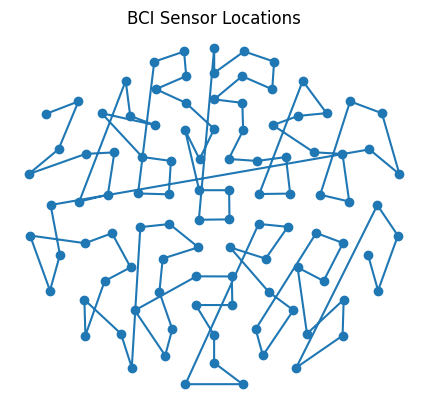

In [2]:
plt.plot(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.scatter(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.title("BCI Sensor Locations")
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')
plt.show()

In [ ]:
def plotBrains(data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    fig, ax = plt.subplots(11,11,figsize=(15,15))
    for i in range(120):
        ii = i // 11
        jj = i % 11
        d = dfunc(data_x,data_y)[i]
        grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
        c = ax[ii][jj].pcolor(grid)
        ax[ii][jj].axis('off')
    ax[10][10].axis('off')
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    fig.suptitle(title)
    plt.savefig(fname)
# transpose so they are (120, 102) each row is an observation
img_class_1_x = feaSubEImg_1[np.arange(0,feaSubEImg_1.shape[0],2)].T
img_class_1_y = feaSubEImg_1[np.arange(1,feaSubEImg_1.shape[0],2)].T
img_class_2_x = feaSubEImg_2[np.arange(0,feaSubEImg_2.shape[0],2)].T
img_class_2_y = feaSubEImg_2[np.arange(1,feaSubEImg_2.shape[0],2)].T

overt_class_1_x = feaSubEOvert_1[np.arange(0,feaSubEOvert_1.shape[0],2)].T
overt_class_1_y = feaSubEOvert_1[np.arange(1,feaSubEOvert_1.shape[0],2)].T
overt_class_2_x = feaSubEOvert_2[np.arange(0,feaSubEOvert_2.shape[0],2)].T
overt_class_2_y = feaSubEOvert_2[np.arange(1,feaSubEOvert_2.shape[0],2)].T

def addXY(d1,d2):
    return d1+d2

plotBrains(img_class_1_x,img_class_1_y,"img_class_1","./img_class_1.png",addXY)
plotBrains(img_class_2_x,img_class_2_y,"img_class_2","./img_class_2.png",addXY)
plotBrains(overt_class_1_x,overt_class_1_x,"overt_class_1","./overt_class_1.png",addXY)
plotBrains(overt_class_1_y,overt_class_1_y,"overt_class_2","./overt_class_2.png",addXY)

In [26]:
img_combined = np.ndarray((feaSubEImg_1.shape[1]+feaSubEImg_2.shape[1],feaSubEImg_1.shape[0]+1))
img_combined[:feaSubEImg_1.shape[1],:feaSubEImg_1.shape[0]] = feaSubEImg_1.T
img_combined[:feaSubEImg_1.shape[1],feaSubEImg_1.shape[0]] = 1
img_combined[feaSubEImg_1.shape[1]:,:feaSubEImg_2.shape[0]] = feaSubEImg_2.T
img_combined[feaSubEImg_1.shape[1]:,feaSubEImg_2.shape[0]] = 2

overt_combined = np.ndarray((feaSubEOvert_1.shape[1]+feaSubEOvert_2.shape[1],feaSubEOvert_1.shape[0]+1))
overt_combined[:feaSubEOvert_1.shape[1],:feaSubEOvert_1.shape[0]] = feaSubEOvert_1.T
overt_combined[:feaSubEOvert_1.shape[1],feaSubEOvert_1.shape[0]] = 1
overt_combined[feaSubEOvert_2.shape[1]:,:feaSubEOvert_1.shape[0]] = feaSubEOvert_2.T
overt_combined[feaSubEOvert_2.shape[1]:,feaSubEOvert_2.shape[0]] = 2
print(img_combined.shape)
print(feaSubEImg_1.T.shape)


(240, 205)
(120, 204)


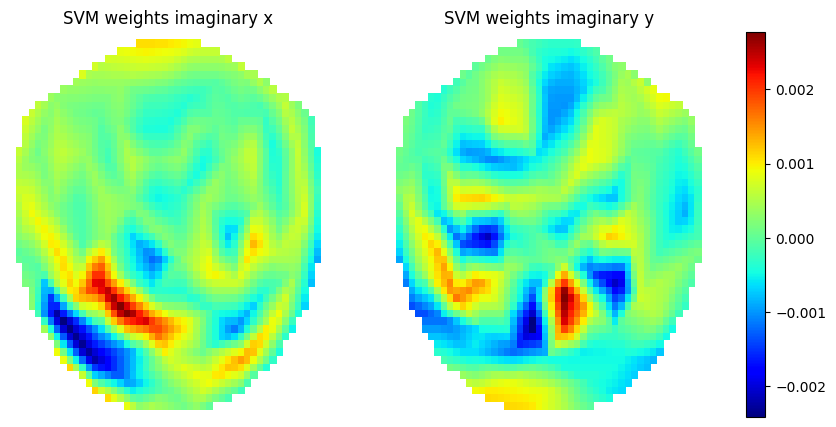

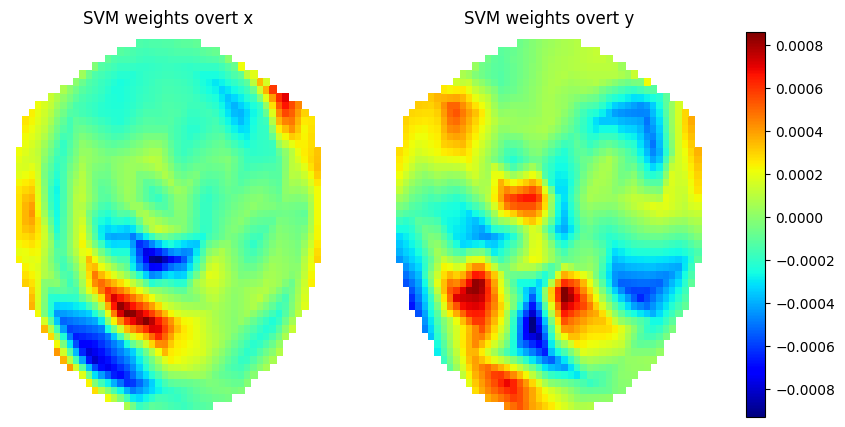

In [32]:
# test NOT FOR FINAL DOC
def func1(d1,d2):
    return d1

def func2(d1,d2):
    return d2

def plotDecisionBoundary(ax, data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    d = dfunc(data_x,data_y)
    grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
    c = ax.pcolor(grid, cmap='jet')
    ax.axis('off')
    ax.set_title(title)
    return c

def svmWeights(data, title, reg=0.001):
    svm = SVC(kernel='linear', C=reg).fit(data[:,:-1],data[:,-1])

    svm_coef_x = svm.coef_[0,np.arange(0,svm.coef_.shape[1],2)]
    svm_coef_y = svm.coef_[0,np.arange(1,svm.coef_.shape[1],2)]
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    plotDecisionBoundary(ax[0], svm_coef_x,svm_coef_y, f"{title} x","",func1)
    c=plotDecisionBoundary(ax[1], svm_coef_x,svm_coef_y,f"{title} y","",func2)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    plt.show()

svmWeights(img_combined, "SVM weights imaginary")

svmWeights(overt_combined, "SVM weights overt")

        

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

testSize = 40
runs = 6
regs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
def two_level_cv(data_left, data_right):

    results = {}
    for runidx in range(runs):
        results[f"run{runidx}"] = {}

        train_left, test_left, train_right, test_right = train_test_split(data_left, data_right, test_size=1/6)
        train_left, f1_left, train_right, f1_right = train_test_split(train_left, train_right, test_size=1/5)
        train_left, f2_left, train_right, f2_right = train_test_split(train_left, train_right, test_size=1/4)
        train_left, f3_left, train_right, f3_right = train_test_split(train_left, train_right, test_size=1/3)
        f5_left, f4_left, f5_right, f4_right = train_test_split(train_left, train_right, test_size=1/2)

        test_set = np.vstack((test_left, test_right))
        folds = [np.vstack((f1_left,f1_right)),np.vstack((f2_left,f2_right)),np.vstack((f3_left,f3_right)),np.vstack((f4_left,f4_right)),np.vstack((f5_left,f5_right))]
        for i in range(5):
            cv_test = folds[i]
            cv_train = np.vstack(folds[:i]+folds[i+1:])

            cv_results = []
            for j in regs:
                svm = SVC(kernel='linear', C=j).fit(cv_train[:,:-1],cv_train[:,-1])
                score = svm.score(cv_test[:,:-1], cv_test[:,-1])
                # decision_stat = svm.decision_function(cv_test[:,:-1])
                cv_results.append((score,j,svm))
            best = max(cv_results, key=lambda x: x[0])
            results[f"run{runidx}"] = {"score": best[0], "reg": best[1], "model": best[2]}
        
        model = results[f"run{runidx}"]['model']
        results[f"run{runidx}"]['test_result'] = model.score(test_set[:,:-1], test_set[:,-1])
        results[f"run{runidx}"]['decision_stats'] = model.decision_function(test_set[:,:-1])
        results[f"run{runidx}"]['decision_labels'] =  test_set[:,-1]
    return results

def plotROC(decisionStats, labels, weights):
    fpr, tpr, thresholds = metrics.roc_curve(decisionStats,labels, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[1].scatter(weights)
    ax[1].set_title(f'SVM weights')

    

    ax[0].plot(fpr,tpr)
    ax[0].set_title(f'ROC detecting left auc:{round(auc,5)}')
    ax[0].plot([0, 1], [0, 1],'r--')
    plt.show()


In [4]:
img_left = np.hstack((feaSubEImg_1.T, np.ones((feaSubEImg_1.T.shape[0],1))))
img_right = np.hstack((feaSubEImg_2.T, np.zeros((feaSubEImg_2.T.shape[0],1))))
overt_left = np.hstack((feaSubEOvert_1.T, np.ones((feaSubEOvert_1.T.shape[0],1))))
overt_right = np.hstack((feaSubEOvert_2.T, np.zeros((feaSubEOvert_2.T.shape[0],1))))

In [19]:
img_img = two_level_cv(img_left,img_right)
pd.DataFrame.from_dict(img_img)

,run0,run1,run2,run3,run4,run5
score,0.95,0.825,0.9,0.9,0.8,0.95
reg,0.001,0.001,0.001,0.001,0.001,0.001
model,"SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')"
test_result,0.825,0.9,0.875,0.85,0.825,0.9
decision_stats,"[3.823847014202302, 2.023487856723028, 2.20333...","[3.302174342761002, 2.0888348999490547, 0.0716...","[1.9777839602409246, 8.10276535883494, 6.62639...","[3.476068696765773, 2.9653215269470876, 3.7215...","[2.88095450763836, 3.105321290894845, 5.699993...","[3.749706862596915, -0.6240913552389398, 4.022..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [5]:
overt_overt = two_level_cv(overt_left,overt_right)
pd.DataFrame.from_dict(overt_overt)

,run0,run1,run2,run3,run4,run5
score,0.975,0.95,0.975,0.925,0.95,0.95
reg,0.001,0.001,0.001,0.001,0.001,0.001
model,"SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')","SVC(C=0.001, kernel='linear')"
test_result,1.0,1.0,0.95,0.95,0.9,0.95
decision_stats,"[1.7476294832441408, 3.207286526149547, 1.9155...","[3.9665245539899745, 1.0526040130839835, 4.694...","[2.5540753543427557, 3.4240126587379276, 1.892...","[1.3912443541820736, 0.7584868478169395, 5.436...","[3.025532571818805, 3.4530951422223635, 1.7325...","[2.5743937591725166, 2.102953489569945, 2.5481..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


TypeError: Axes.scatter() missing 1 required positional argument: 'y'

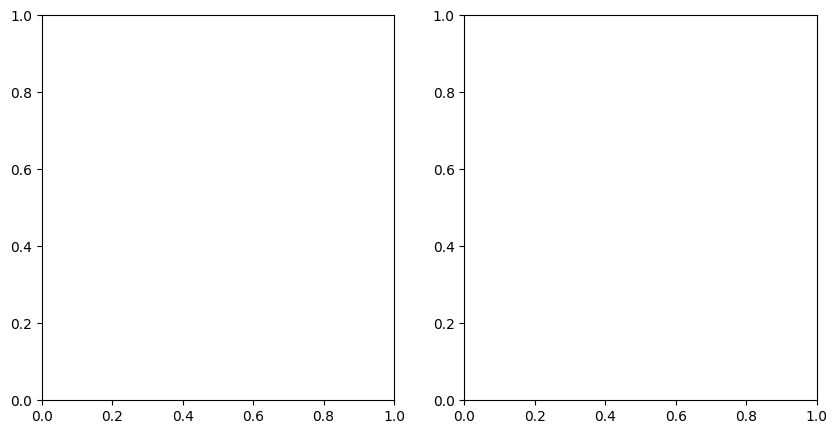

In [17]:
for run in overt_overt.values():
    decision_stats = run['decision_stats']
    labels = run['decision_labels']
    weights = run['model'].coef_
    plotROC(np.array(decision_stats,dtype=int), np.array(labels, dtype=int), weights)